In [38]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("archivo_limpio.csv")

In [40]:
df.head(3)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_amazon_web_services_(aws),Q27_microsoft_azure,Q27_google_cloud_platform_(gcp),Q27_ibm_cloud_/_red_hat,Q27_oracle_cloud,Q27_sap_cloud,Q27_vmware_cloud,Q27_salesforce_cloud,Q27_alibaba_cloud,Q27_tencent_cloud,Q27_none,Q27_other,Q29_amazon_elastic_compute_cloud_(ec2),Q29_microsoft_azure_virtual_machines,Q29_google_cloud_compute_engine,Q29_none,Q31_amazon_sagemaker,Q31_azure_machine_learning_studio,Q31_google_cloud_vertex_ai,Q31_datarobot,Q31_databricks,Q31_dataiku,Q31_alteryx,Q31_rapidminer,Q31_none,Q31_other,Q32_mysql,Q32_postgresql,Q32_sqlite,Q32_oracle_database,Q32_mongodb,Q32_snowflake,Q32_ibm_db2,Q32_microsoft_sql_server,Q32_microsoft_azure_sql_database,Q32_microsoft_azure_cosmos_db,Q32_amazon_redshift,Q32_amazon_aurora,Q32_amazon_dynamodb,Q32_amazon_rds,Q32_google_cloud_bigquery,Q32_google_cloud_sql,Q32_google_cloud_firestore,Q32_google_cloud_bigtable,Q32_google_cloud_spanner,Q32_none,Q34_microsoft_power_bi,Q34_amazon_quicksight,Q34_google_data_studio,Q34_looker,Q34_tableau,Q34_salesforce,Q34_tableau_crm,Q34_qlik,Q34_domo,Q34_tibco_spotfire,Q34_alteryx,Q34_sisense,Q34_sap_analytics_cloud,Q34_microsoft_azure_synapse,Q34_thoughtspot,Q34_none,Q34_other,Q36_data_augmentation,Q36_feature_engineering/selection,Q36_model_selection,Q36_model_architecture_searches,Q36_hyperparameter_tuning,Q36_full_ml_pipelines,Q36_none,Q36_other,Q37_google_cloud_automl,Q37_h2o_driverless_ai,Q37_databricks_automl,Q37_datarobot_automl,Q37_amazon_sagemaker_autopilot,Q37_azure_automated_machine_learning,Q37_none,Q37_other,Q38_neptune.ai,Q38_weights_&_biases,Q38_comet.ml,Q38_sacred_+_omniboard,Q38_tensorboard,Q38_guild.ai,Q38_polyaxon,Q38_clearml,Q38_domino_model_monitor,Q38_mlflow,Q38_none,Q38_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,29999.0,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",69999.0,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Columns: 130 entries, age to Q38_other
dtypes: float64(1), object(129)
memory usage: 25.8+ MB


## COLUMNA IDE

Dividimos por columnas, creando un Dataframe nuevo, y contamos cuantas veces aparece cada valor

In [42]:
df['IDE'].value_counts() #Sacamos los valores únicos de la columna IDE

Jupyter Notebook                                                                                                                   2341
Visual Studio Code (VSCode) ,Jupyter Notebook                                                                                      1412
Visual Studio Code (VSCode)                                                                                                         939
PyCharm ,Jupyter Notebook                                                                                                           820
Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook                                                                              554
                                                                                                                                   ... 
RStudio ,Visual Studio , Spyder, Vim / Emacs,Jupyter Notebook                                                                         1
Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Vi

In [43]:
df_IDE = df['IDE'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_IDE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Vim / Emacs,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Notepad++,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
2,PyCharm,Jupyter Notebook,Other,None,None,None,None,None,None,None,None,None,None,None
3,Spyder,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
4,Spyder,MATLAB,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None


In [44]:
# Contamos los valores únicos del df_IDE -- pendiente eliminar Jupyter repetido
df_IDE.stack().value_counts()

Jupyter Notebook                16233
Visual Studio Code (VSCode)     10040
PyCharm                          7468
Jupyter (JupyterLab              5488
 Jupyter Notebooks               5488
 etc)                            5488
RStudio                          4771
Visual Studio                    4110
 Notepad++                       3937
 Spyder                          3794
 Sublime Text                    2839
MATLAB                           2203
 Vim / Emacs                     1646
 Other                           1491
 None                             526
dtype: int64

In [45]:
# Creamos un DF con la suma de los valores únicos
nombres_ide = df_IDE.stack().value_counts().reset_index() # renombramos las columnas de IDE
nombres_ide.rename(columns= {"index": "IDE_name",0: "cantidad"}, inplace= True)
nombres_ide


,IDE_name,cantidad
0,Jupyter Notebook,16233
1,Visual Studio Code (VSCode),10040
2,PyCharm,7468
3,Jupyter (JupyterLab,5488
4,Jupyter Notebooks,5488
5,etc),5488
6,RStudio,4771
7,Visual Studio,4110
8,Notepad++,3937
9,Spyder,3794


In [46]:
# Eliminamos los valores incorrectos y modificamos el nombre incorrecto
nombres_ide.drop([4,5], axis= 0, inplace= True) 
nombres_ide.replace("Jupyter (JupyterLab", "JupyterLab", inplace= True) 


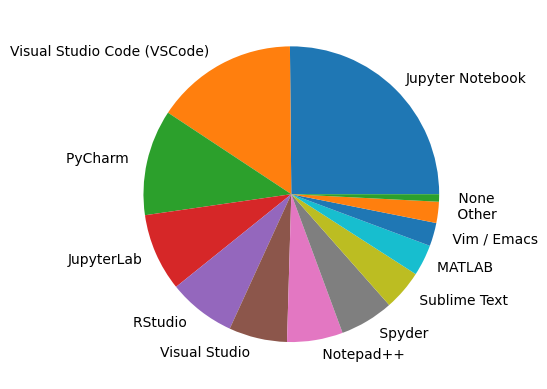

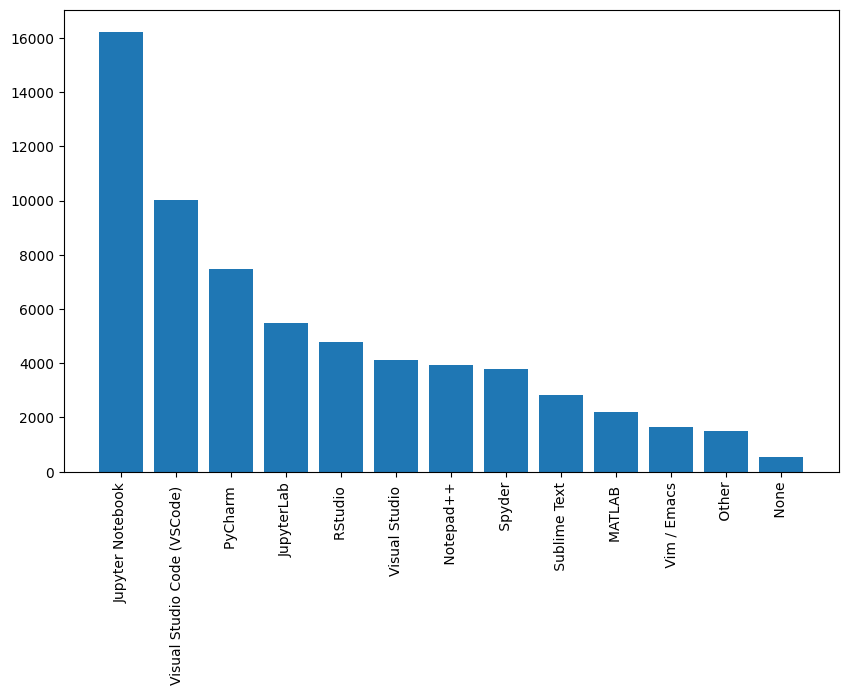

In [47]:
plt.figure()
plt.pie(nombres_ide["cantidad"], labels=nombres_ide["IDE_name"])
plt.show()
plt.figure(figsize= (10,6))
plt.bar(nombres_ide["IDE_name"],nombres_ide["cantidad"])
plt.xticks(rotation = 90)
plt.show();


## COLUMNA LENGUAJE_UTILIZADO

Dividimos por columnas, creando un Dataframe nuevo, y contamos cuantas veces aparece cada valor

In [48]:
df_lenguaje = df['lenguaje_utilizado'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_lenguaje

,0,1,2,3,4,5,6,7,8,9,10,11
0,Python,R,None,None,None,None,None,None,None,None,None,None
1,SQL,C,C++,Java,None,None,None,None,None,None,None,None
2,Python,C++,Java,None,None,None,None,None,None,None,None,None
3,Python,None,None,None,None,None,None,None,None,None,None,None
4,Python,C,MATLAB,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
25968,Python,SQL,Javascript,Bash,None,None,None,None,None,None,None,None
25969,Python,None,None,None,None,None,None,None,None,None,None,None
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Python,SQL,None,None,None,None,None,None,None,None,None,None


In [49]:
#Sacamos los valores únicos de df_lenguaje
df_lenguaje.stack().value_counts()

Python         21860
 SQL           10756
 C++            5535
 R              5334
 Java           4769
 C              4709
 Javascript     4332
 MATLAB         2935
 Other          2575
 Bash           2216
 None            319
 Julia           305
 Swift           242
dtype: int64

In [50]:
# Creamos un DF con la suma de los valores únicos
lenguajes = df_lenguaje.stack().value_counts().reset_index() # contamos valores únicos de lenguaje
lenguajes.rename(columns= {"index": "lenguajes_programacion", 0: "suma"}, inplace= True)
lenguajes

,lenguajes_programacion,suma
0,Python,21860
1,SQL,10756
2,C++,5535
3,R,5334
4,Java,4769
5,C,4709
6,Javascript,4332
7,MATLAB,2935
8,Other,2575
9,Bash,2216


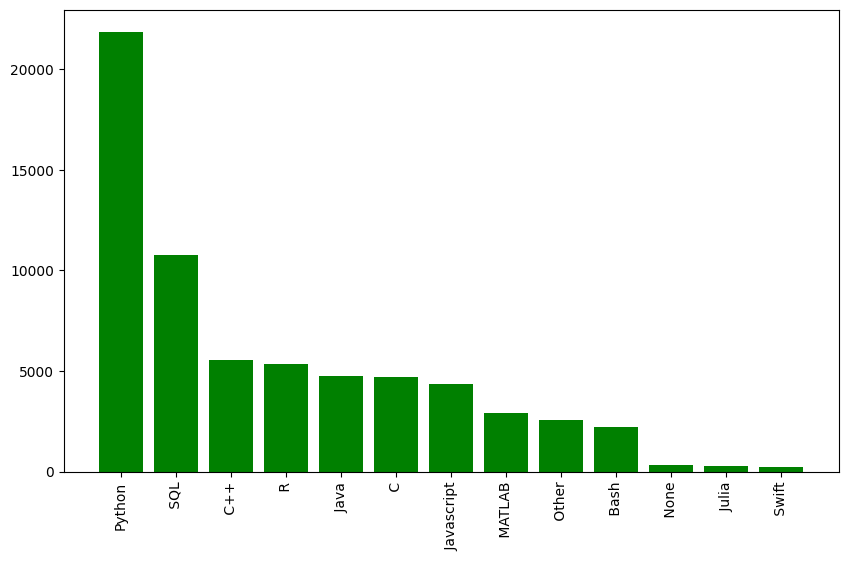

In [51]:
# countplot de lenguajes
plt.figure(figsize= (10,6))
plt.bar(lenguajes["lenguajes_programacion"],lenguajes["suma"], color = "green")
plt.xticks(rotation = 90)
plt.show();


## HERRAMIENTAS DE VISUALIZACIÓN

Creamos un Dataframe solo con las columnas index, age, gender, puesto_trabajo y herramientas_visualizacion

In [52]:
df_visualizacion = df[["age", "gender", "puesto_trabajo", "herramientas_visualizacion"]]

In [53]:
df_visualizacion.head(10)

,age,gender,puesto_trabajo,herramientas_visualizacion
0,50-54,Man,Other,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ..."
1,50-54,Man,Program/Project Manager,Matplotlib
2,22-24,Man,Software Engineer,Matplotlib
3,45-49,Man,Research Scientist,Matplotlib
4,45-49,Man,Other,"Matplotlib ,Seaborn ,Ggplot / ggplot2"
5,25-29,Woman,Currently not employed,"Matplotlib ,Seaborn ,Ggplot / ggplot2"
6,18-21,Woman,Student,Geoplotlib
7,30-34,Man,Data Scientist,"Matplotlib ,Plotly / Plotly Express"
8,22-24,Man,Currently not employed,Matplotlib
9,30-34,Man,Other,"Matplotlib ,Seaborn"


In [54]:
df_visualizacion["herramientas_visualizacion"] = df_visualizacion['herramientas_visualizacion'].str.split(",") #Convertimos la columna "herramientas_visualizacion" en lista

/tmp/ipykernel_1058/574524737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualizacion["herramientas_visualizacion"] = df_visualizacion['herramientas_visualizacion'].str.split(",") #Convertimos la columna "herramientas_visualizacion" en lista


In [55]:
# Comprobamos que son listas
df_visualizacion.head()

,age,gender,puesto_trabajo,herramientas_visualizacion
0,50-54,Man,Other,"[ Matplotlib , Seaborn , Ggplot / ggplot2 , Sh..."
1,50-54,Man,Program/Project Manager,[ Matplotlib ]
2,22-24,Man,Software Engineer,[ Matplotlib ]
3,45-49,Man,Research Scientist,[ Matplotlib ]
4,45-49,Man,Other,"[ Matplotlib , Seaborn , Ggplot / ggplot2 ]"


In [56]:
df_visualizacion = df_visualizacion.explode("herramientas_visualizacion") #Con explode, separamos las listas en filas

In [57]:
# Comprobamos
df_visualizacion.head()

,age,gender,puesto_trabajo,herramientas_visualizacion
0,50-54,Man,Other,Matplotlib
0,50-54,Man,Other,Seaborn
0,50-54,Man,Other,Ggplot / ggplot2
0,50-54,Man,Other,Shiny
0,50-54,Man,Other,Leaflet / Folium


GRAFICA CON LAS HERRAMIENTAS DE VISUALIZACION PARA TRABAJADORES Y ESTUDIANTES

In [58]:
# Creamos una lista con los diferentes valores para ordenar los subplots
lista_visualizacion = list(df_visualizacion["herramientas_visualizacion"][df_visualizacion["herramientas_visualizacion"].notnull()].unique())

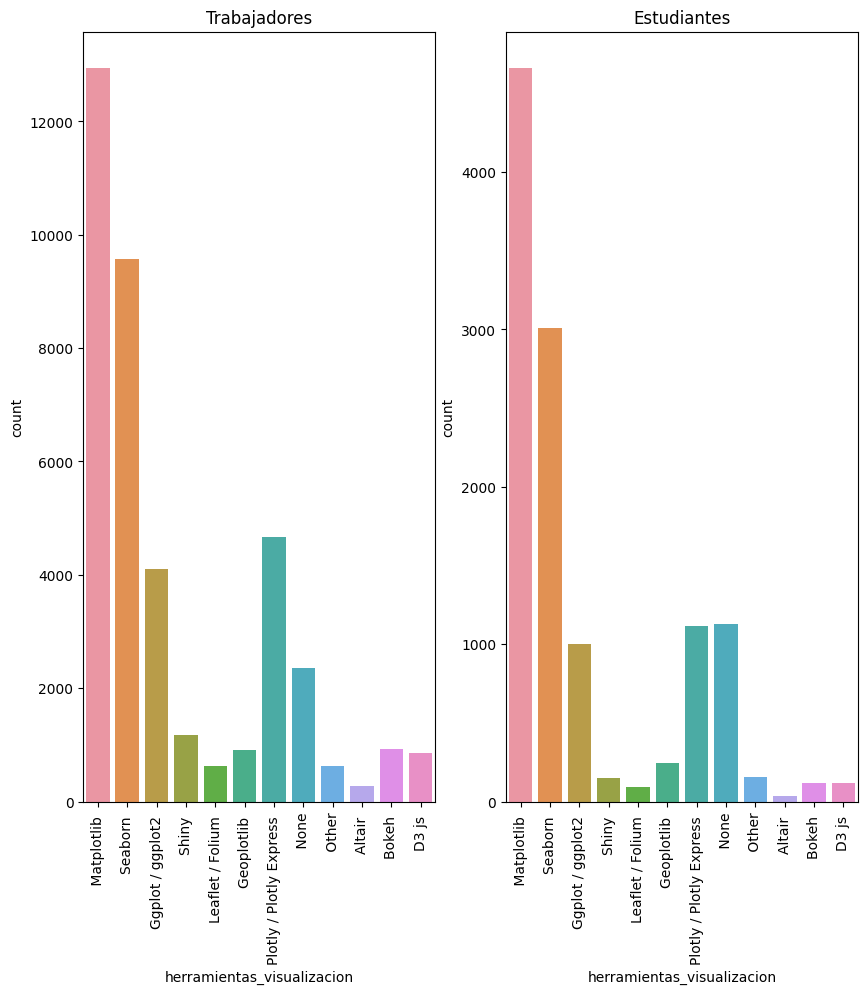

In [59]:
fig,ax = plt.subplots(1,2, figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]!= "Student"], ax=ax[0], order=lista_visualizacion)
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]== "Student"], ax=ax[1], order= lista_visualizacion)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Trabajadores")
ax[1].set_title("Estudiantes")
fig.show()

In [60]:
def trabajador(puesto):
    if puesto == "Student" or puesto == "Currently not employed":
        return "Student or unemployed"
    else:
        return "Employee"

In [61]:
df_visualizacion["trabajo"] = df_visualizacion["puesto_trabajo"].apply(trabajador)

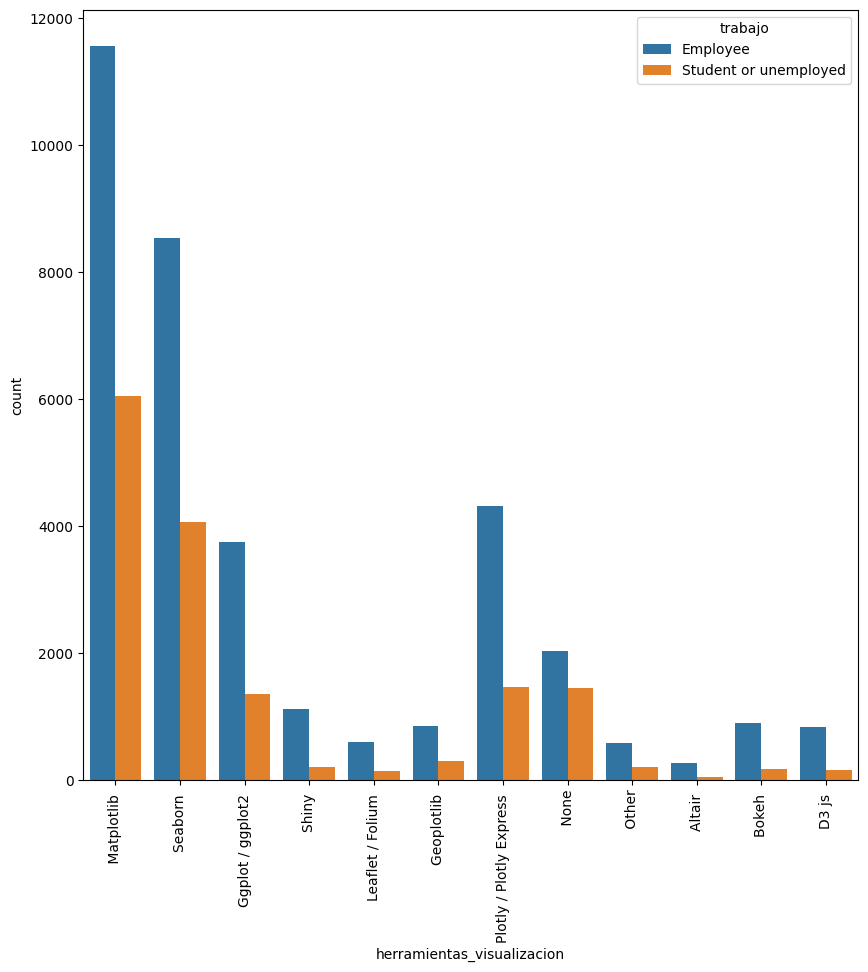

In [62]:
plt.figure(figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion, hue= "trabajo", order=lista_visualizacion)
plt.xticks(rotation = 90)

fig.show()

GRAFICA CON LAS HERRAMIENTAS DE VISUALIZACION PARA TRABAJADORES POR GÉNERO

Text(0.5, 1.0, 'Herramientas de visualización por género')

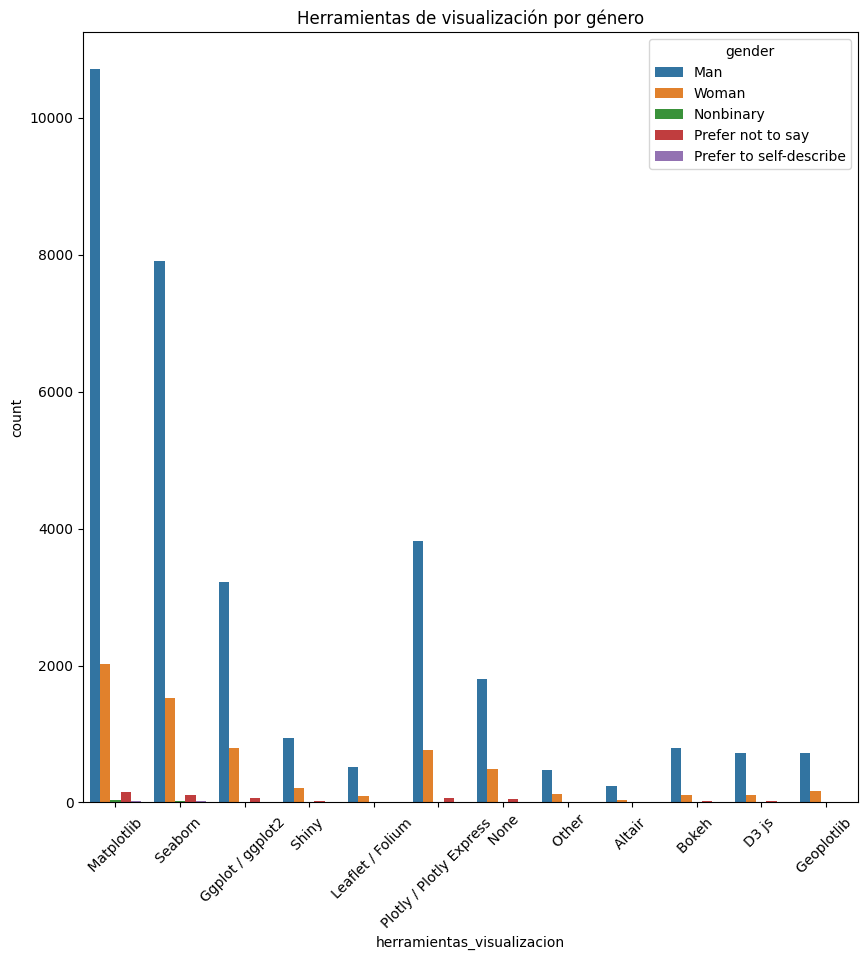

In [63]:
plt.figure(figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]!= "Student"], hue="gender")
plt.xticks(rotation = 45)
plt.title("Herramientas de visualización por género")


## PREGUNTA LENGUAJE RECOMENDADO

In [64]:
# Comprobamos los valores únicos
df["lenguaje_recomendado"].value_counts()

Python        20213
R              1445
SQL            1338
C               440
C++             437
Java            242
MATLAB          215
Other           176
Julia           137
Javascript      133
None            111
Bash             38
Swift            15
Name: lenguaje_recomendado, dtype: int64

In [65]:
# Creamos una lista para ordenar los subplots
lista_leng = list(df["lenguaje_recomendado"].unique())

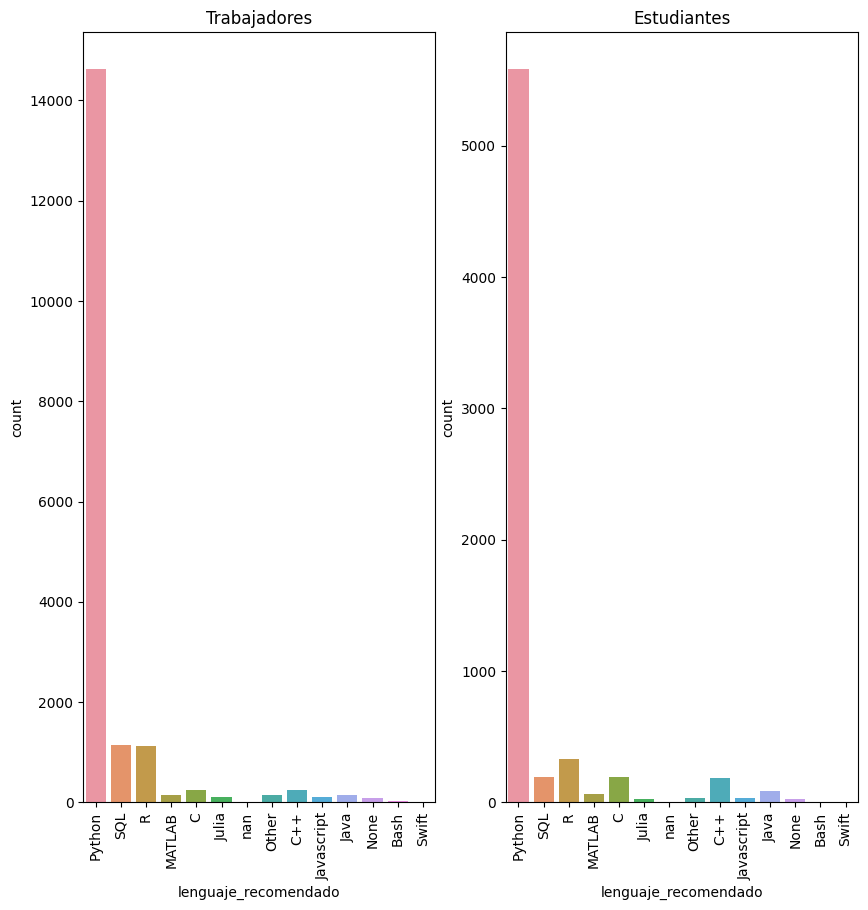

In [66]:
fig,ax = plt.subplots(1,2, figsize= (10,10))
sns.countplot(x = "lenguaje_recomendado", data=df[df["puesto_trabajo"]!= "Student"], ax=ax[0], order= lista_leng)
sns.countplot(x = "lenguaje_recomendado", data=df[df["puesto_trabajo"]== "Student"], ax=ax[1], order= lista_leng)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Trabajadores")
ax[1].set_title("Estudiantes")
fig.show()